In [ ]:
!pip install requests pandas matplotlib

In [ ]:
# Install Required Libraries
!pip install requests pandas matplotlib

# Fetch and Process NASA Space Weather Data
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Your NASA Open Data API key
API_KEY = 'rRB0RSEWFHlBR7p7yJ5UBpGncHOiink095D86cZx'  # Replace with your actual NASA API key

# Endpoint to fetch notifications about space weather events
NOTIFICATIONS_ENDPOINT = f'https://api.nasa.gov/DONKI/CME?api_key={API_KEY}'

# Fetching space weather data
response = requests.get(NOTIFICATIONS_ENDPOINT)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print("Data fetched successfully!")

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Display the first few rows of the DataFrame
    print(df.head())

    # Process and visualize the data
    if 'startDate' in df.columns:
        df['startDate'] = pd.to_datetime(df['startDate'])
        df['endDate'] = pd.to_datetime(df['endDate'])

        # Plotting the number of notifications over time
        plt.figure(figsize=(10, 5))
        df['startDate'].value_counts().sort_index().plot(kind='bar')
        plt.title('Number of Space Weather Notifications Over Time')
        plt.xlabel('Date')
        plt.ylabel('Number of Notifications')
        plt.xticks(rotation=45)
        plt.show()
else:
    print("Failed to fetch data:", response.status_code)


Data fetched successfully!
                    activityID      catalog          startTime  \
0  2024-08-30T00:00:00-CME-001  M2M_CATALOG  2024-08-30T00:00Z   
1  2024-08-30T00:36:00-CME-001  M2M_CATALOG  2024-08-30T00:36Z   
2  2024-08-30T12:53:00-CME-001  M2M_CATALOG  2024-08-30T12:53Z   
3  2024-08-31T00:23:00-CME-001  M2M_CATALOG  2024-08-31T00:23Z   
4  2024-08-31T00:36:00-CME-001  M2M_CATALOG  2024-08-31T00:36Z   

                                         instruments sourceLocation  \
0  [{'displayName': 'SOHO: LASCO/C2'}, {'displayN...                  
1  [{'displayName': 'SOHO: LASCO/C2'}, {'displayN...         N22E47   
2  [{'displayName': 'SOHO: LASCO/C2'}, {'displayN...         S12E55   
3  [{'displayName': 'STEREO A: SECCHI/COR2'}, {'d...                  
4  [{'displayName': 'SOHO: LASCO/C2'}, {'displayN...         N20E28   

   activeRegionNum                                               note  \
0              NaN  A very faint minor CME only seen in a few earl...   
1  

          Start Time Source Location  Active Region Number  \
0  2024-08-30T00:00Z                                   NaN   
1  2024-08-30T00:36Z          N22E47                   NaN   
2  2024-08-30T12:53Z          S12E55               13806.0   
3  2024-08-31T00:23Z                                   NaN   
4  2024-08-31T00:36Z          N20E28               13804.0   
5  2024-08-31T00:53Z                                   NaN   
6  2024-08-31T01:38Z                                   NaN   
7  2024-08-31T12:23Z                                   NaN   
8  2024-09-01T03:24Z          S16W19               13807.0   
9  2024-09-01T12:23Z          S25E90                   NaN   

                                        Summary Note  \
0  A very faint minor CME only seen in a few earl...   
1  Faint CME in the northeast with the source a m...   
2  Faint CME to the southeast. There may be two l...   
3  CME seen to the W in all coronagraphs, but bes...   
4  CME seen to the NE in all coronagr

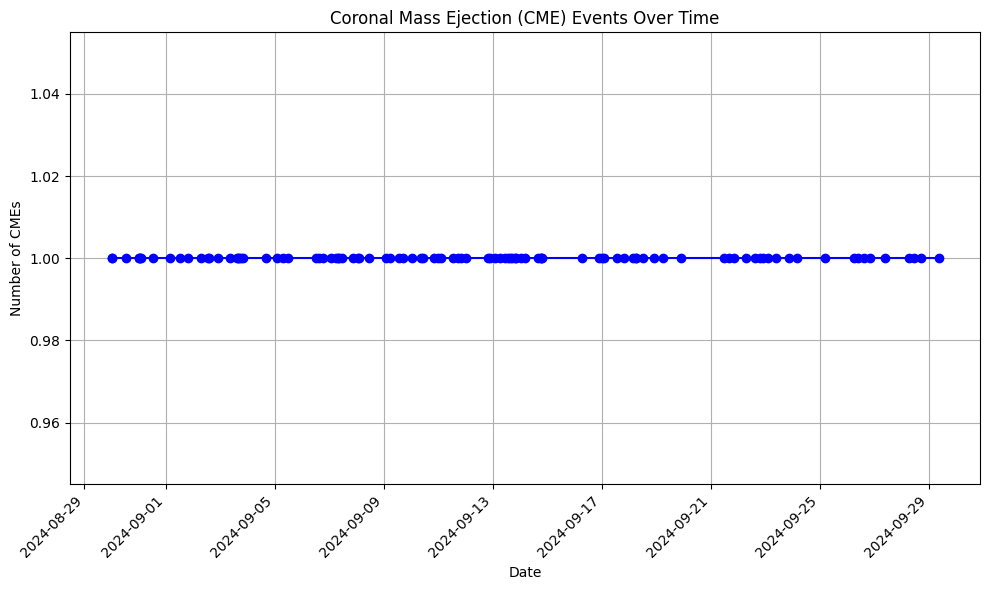

In [ ]:
# Display only relevant columns
df_summary = df[['startTime', 'sourceLocation', 'activeRegionNum', 'note', 'link']]

# Rename columns for better readability
df_summary.columns = ['Start Time', 'Source Location', 'Active Region Number', 'Summary Note', 'More Information']

# Display the summary DataFrame
print(df_summary.head(10))  # Display the first 10 rows

# Convert 'startTime' to a pandas datetime object
df['startTime'] = pd.to_datetime(df['startTime'])

# Plot CME events over time
plt.figure(figsize=(10, 6))
df['startTime'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Coronal Mass Ejection (CME) Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of CMEs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


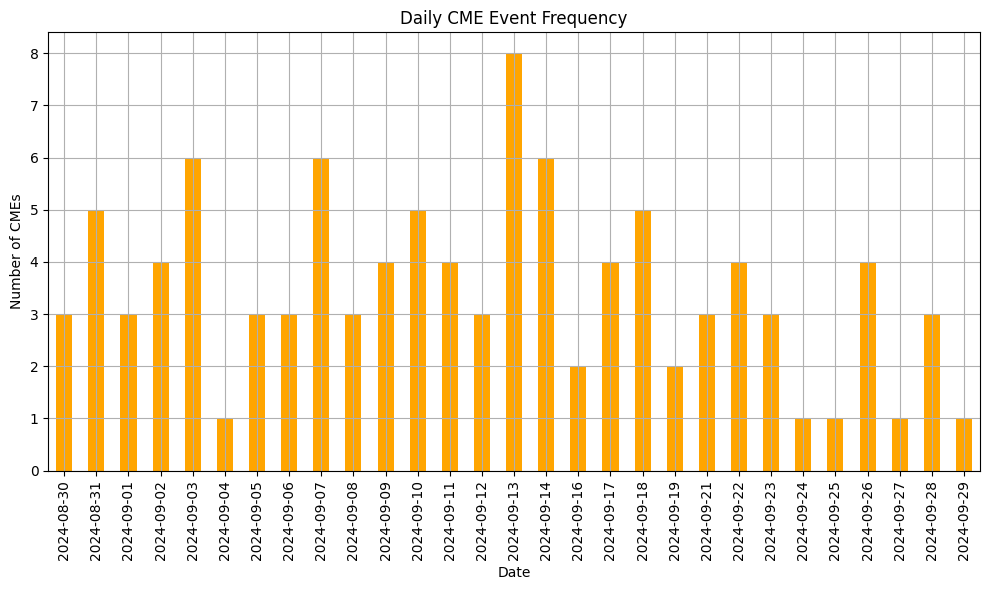

In [ ]:
# Group data by the day to see the number of CME events per day
df_daily_cme = df['startTime'].dt.date.value_counts().sort_index()

# Plot the daily frequency of CME events
plt.figure(figsize=(10, 6))
df_daily_cme.plot(kind='bar', color='orange')
plt.title('Daily CME Event Frequency')
plt.xlabel('Date')
plt.ylabel('Number of CMEs')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


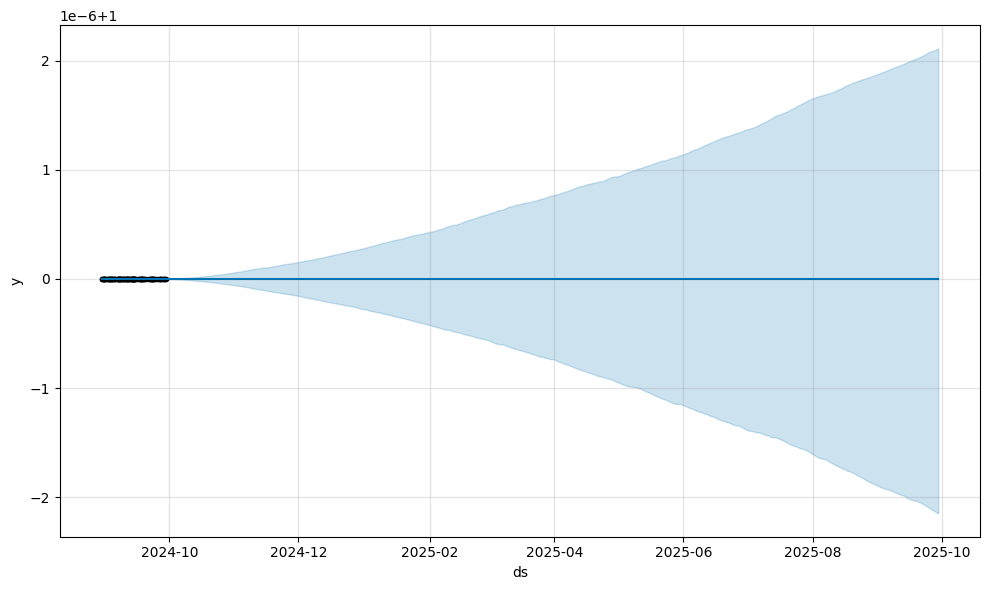

In [ ]:
# Remove timezone information from the 'startTime' column
df_prophet['ds'] = pd.to_datetime(df_prophet['ds']).dt.tz_localize(None)

# Now fit the Prophet model
model.fit(df_prophet)

# Create a dataframe to hold future dates (e.g., 365 days into the future)
future = model.make_future_dataframe(periods=365)

# Predict future data
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


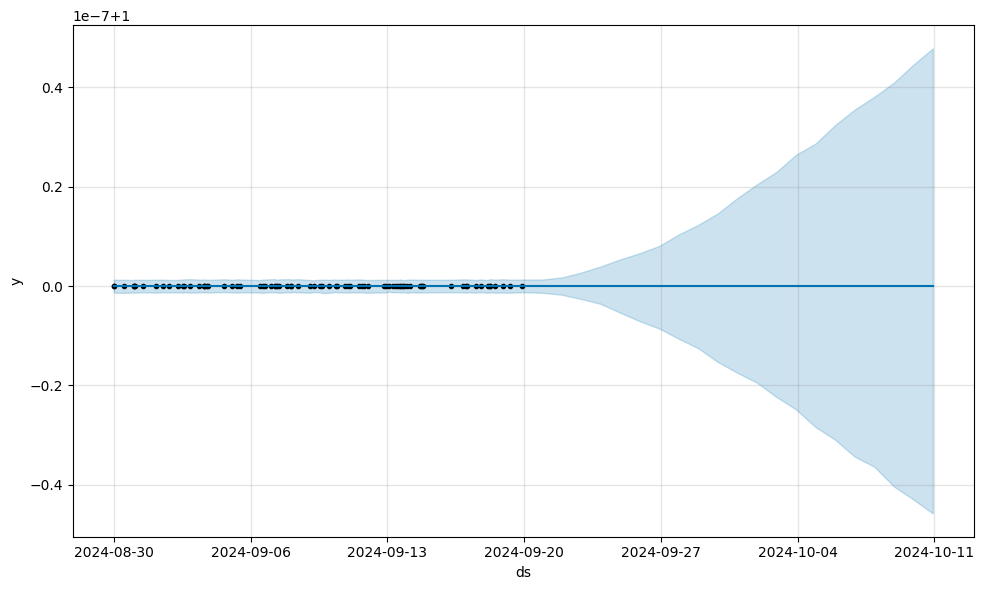

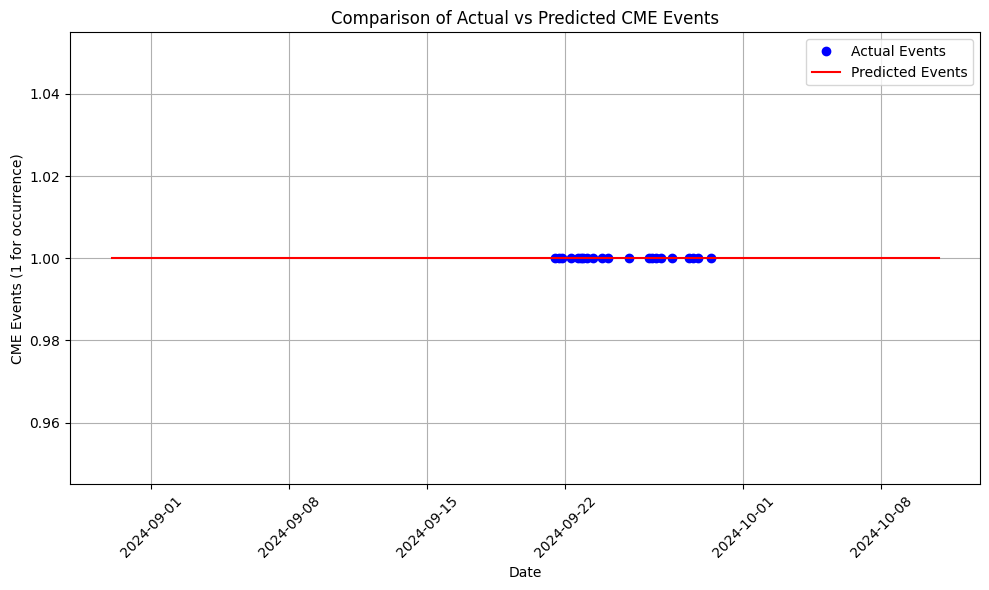

Mean Absolute Error (MAE): 0.00
   Actual  Predicted
0       1        1.0
1       1        1.0
2       1        1.0
3       1        1.0
4       1        1.0
5       1        1.0
6       1        1.0
7       1        1.0
8       1        1.0
9       1        1.0


In [ ]:
# Remove timezone information from 'startTime'
df_prophet['ds'] = pd.to_datetime(df_prophet['ds']).dt.tz_localize(None)

# Set up a binary target for occurrences (e.g., CME events)
df_prophet['y'] = 1  # Every occurrence of a CME is set to 1

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(df_prophet) * 0.8)
train_data = df_prophet[:train_size]
test_data = df_prophet[train_size:]

# Initialize and fit the Prophet model on the training data
model = Prophet()
model.fit(train_data)

# Make predictions for the entire dataset (including future dates)
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

# Plot the forecast with the original data
model.plot(forecast)
plt.show()

# Visualize the comparison of actual and predicted values
plt.figure(figsize=(10, 6))

# Plot actual values (y=1 for each actual event in the test data)
plt.plot(test_data['ds'], test_data['y'], 'bo', label='Actual Events')

# Plot predicted values from the model forecast
plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Predicted Events')

plt.title('Comparison of Actual vs Predicted CME Events')
plt.xlabel('Date')
plt.ylabel('CME Events (1 for occurrence)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate the model performance by comparing predicted vs. actual data

# Get predicted values for the test data
predicted_values = forecast[['ds', 'yhat']].tail(len(test_data)).reset_index(drop=True)

# Calculate Mean Absolute Error (MAE) as an evaluation metric
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_data['y'], predicted_values['yhat'])
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Optional: Check the first few rows of the predicted and actual comparison
comparison = pd.DataFrame({
    'Actual': test_data['y'].values,
    'Predicted': predicted_values['yhat'].values
})
print(comparison.head(10))